In [62]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
import os
from PIL import Image
import numpy as np

def load_and_resize_doodles(input_folders, size=(28, 28)):
    X = []

    for input_folder in input_folders:
        for filename in os.listdir(input_folder):
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                with Image.open(os.path.join(input_folder, filename)) as img:
                    # Convert to grayscale
                    img = img.convert('L')

                    # Resize the image
                    img_resized = img.resize(size, Image.LANCZOS)

                    # Convert image to numpy array
                    img_array = np.array(img_resized)

                    # Invert the image (assuming doodles are dark on light background)
                    img_array = 255 - img_array

                    # Enhance contrast
                    img_array = np.clip(img_array * 1.5, 0, 255).astype(np.uint8)

                    # Normalize to [0, 1]
                    img_array = img_array / 255.0

                    # Append to X
                    X.append(img_array)

                    print(f"Processed: {os.path.join(input_folder, filename)}")

    # Convert list to numpy array
    X = np.array(X)

    return X

# Usage
input_folders = [
    '/content/drive/MyDrive/Circles & Ellipses',
    '/content/drive/MyDrive/Rectangles & Rounded Rectangles',
    '/content/drive/MyDrive/Straight Lines',
    '/content/drive/MyDrive/Star',
    '/content/drive/MyDrive/Regular Polygons'
]

X = load_and_resize_doodles(input_folders)

print(f"X shape: {X.shape}")
print(f"Shape of each image: {X[0].shape}")

Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock10.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock12.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock15.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock20.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock2.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock14.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock19.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock17.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock1.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock18.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock16.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock11.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock13.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock9.png
Processed: /content/dri

In [65]:
X[10].shape

(28, 28)

In [66]:
X[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.00392157,
        0.        , 0.        , 0.00392157, 0.        , 0.00392157,
        0.        , 0.    

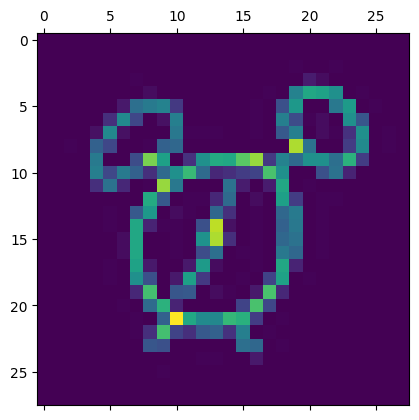

In [67]:
plt.matshow(X[12])

In [68]:
import numpy as np

y = np.concatenate([
    np.full(441,0),
    np.full(205, 1),
    np.full(150, 2),
    np.full(116, 3),
    np.full(191, 4)
])

# 0 -> circle and ellipse
# 1 -> Rectangles & Rounded Rectangles
# 2 -> Straight Lines
# 3 -> Star
# 4 -> Regular polygon

In [69]:
y.shape

(1103,)

In [70]:
import numpy as np
from sklearn.model_selection import train_test_split
indices = np.arange(len(y))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [71]:
X_train.shape

(992, 28, 28)

In [72]:
y_train.shape

(992,)

In [73]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [74]:
X_train_flattened.shape

(992, 784)

In [75]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [76]:
y_test[:100]

array([1, 0, 0, 2, 0, 4, 1, 0, 4, 0, 1, 1, 1, 4, 0, 4, 0, 1, 3, 1, 2, 2,
       1, 0, 0, 4, 1, 2, 1, 2, 1, 2, 2, 4, 0, 4, 0, 1, 4, 3, 2, 2, 1, 1,
       4, 4, 0, 4, 4, 0, 3, 2, 0, 0, 1, 2, 2, 0, 1, 3, 0, 4, 2, 3, 0, 1,
       1, 2, 3, 3, 3, 1, 3, 0, 0, 4, 0, 0, 1, 4, 0, 2, 4, 3, 1, 4, 3, 0,
       0, 1, 0, 4, 0, 0, 0, 1, 3, 0, 0, 0])

In [77]:

from tensorflow import keras

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


model = tf.keras.Sequential([
    # Reshape the input from (784,) to (28, 28, 1)
    layers.Reshape((28, 28, 1), input_shape=(784,)),

    layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(5, activation='softmax')  # 5 output classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=100, validation_split=0.1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.2527 - loss: 1.9313 - val_accuracy: 0.3800 - val_loss: 1.5382
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.4571 - loss: 1.5393 - val_accuracy: 0.3800 - val_loss: 1.5010
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.5309 - loss: 1.2137 - val_accuracy: 0.3800 - val_loss: 1.4880
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.6308 - loss: 1.0203 - val_accuracy: 0.3800 - val_loss: 1.4783
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.6586 - loss: 0.8693 - val_accuracy: 0.3800 - val_loss: 1.4761
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.6705 - loss: 0.8769 - val_accuracy: 0.3800 - val_loss: 1.4637
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.7569 - loss: 0.6494 - val_accuracy: 0.3800 - val_loss: 1.4677
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.7551 - loss: 0.6247 - val_accuracy: 0

In [78]:
evaluation = model.evaluate(X_test_flattened, y_test)
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

predictions = model.predict(X_test_flattened)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8310 - loss: 0.7385
Test Loss: 0.687072217464447
Test Accuracy: 0.837837815284729
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


In [79]:
vector = predictions[12]
max_index = np.argmax(vector)
max_index

1

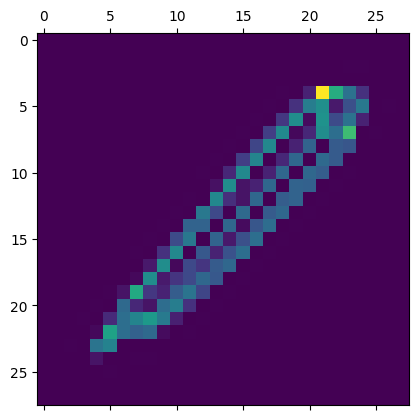

In [80]:
plt.matshow(X_test[12])